In [2]:
# Add python 2 and python 2 support
from __future__ import division, print_function, unicode_literals

# Setup

In [63]:
# Import libraries
import os
import tarfile
import csv
import urllib2
import numpy as np
import numpy.random as rnd
import pandas as pd

# Random seed
rnd.seed(7)

# Plotting libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Directories
root_dir = os.path.join(os.path.dirname('__file__'), os.pardir)

def save_fig(fname, tight_layout = True):
    path = os.path.join(root_dir, 'images', fname + '.png')
    print("Saving figure", fname)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Access Data

In [51]:
data_url = 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/train.csv'

In [146]:
# DOES NOT WORK FOR KAGGLE (YET)
def fetch_data(url, dpath):
    if not os.path.exists(dpath):
        os.makedirs(dpath)
    fname = os.path.join(dpath, url.rsplit('/', 1)[-1]) 
    urllib.request.urlretrieve(url, fname)
    return fname

In [41]:
fname = fetch_data(data_url, os.path.join(root_dir, 'data'))

In [45]:
print(fname)

../data/train.csv


In [48]:
def load_data(fname):
    return pd.read_csv(fname)

In [52]:
fname = os.path.join(root_dir, 'data', 'train.csv')
housing = load_data(fname)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [54]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [170]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


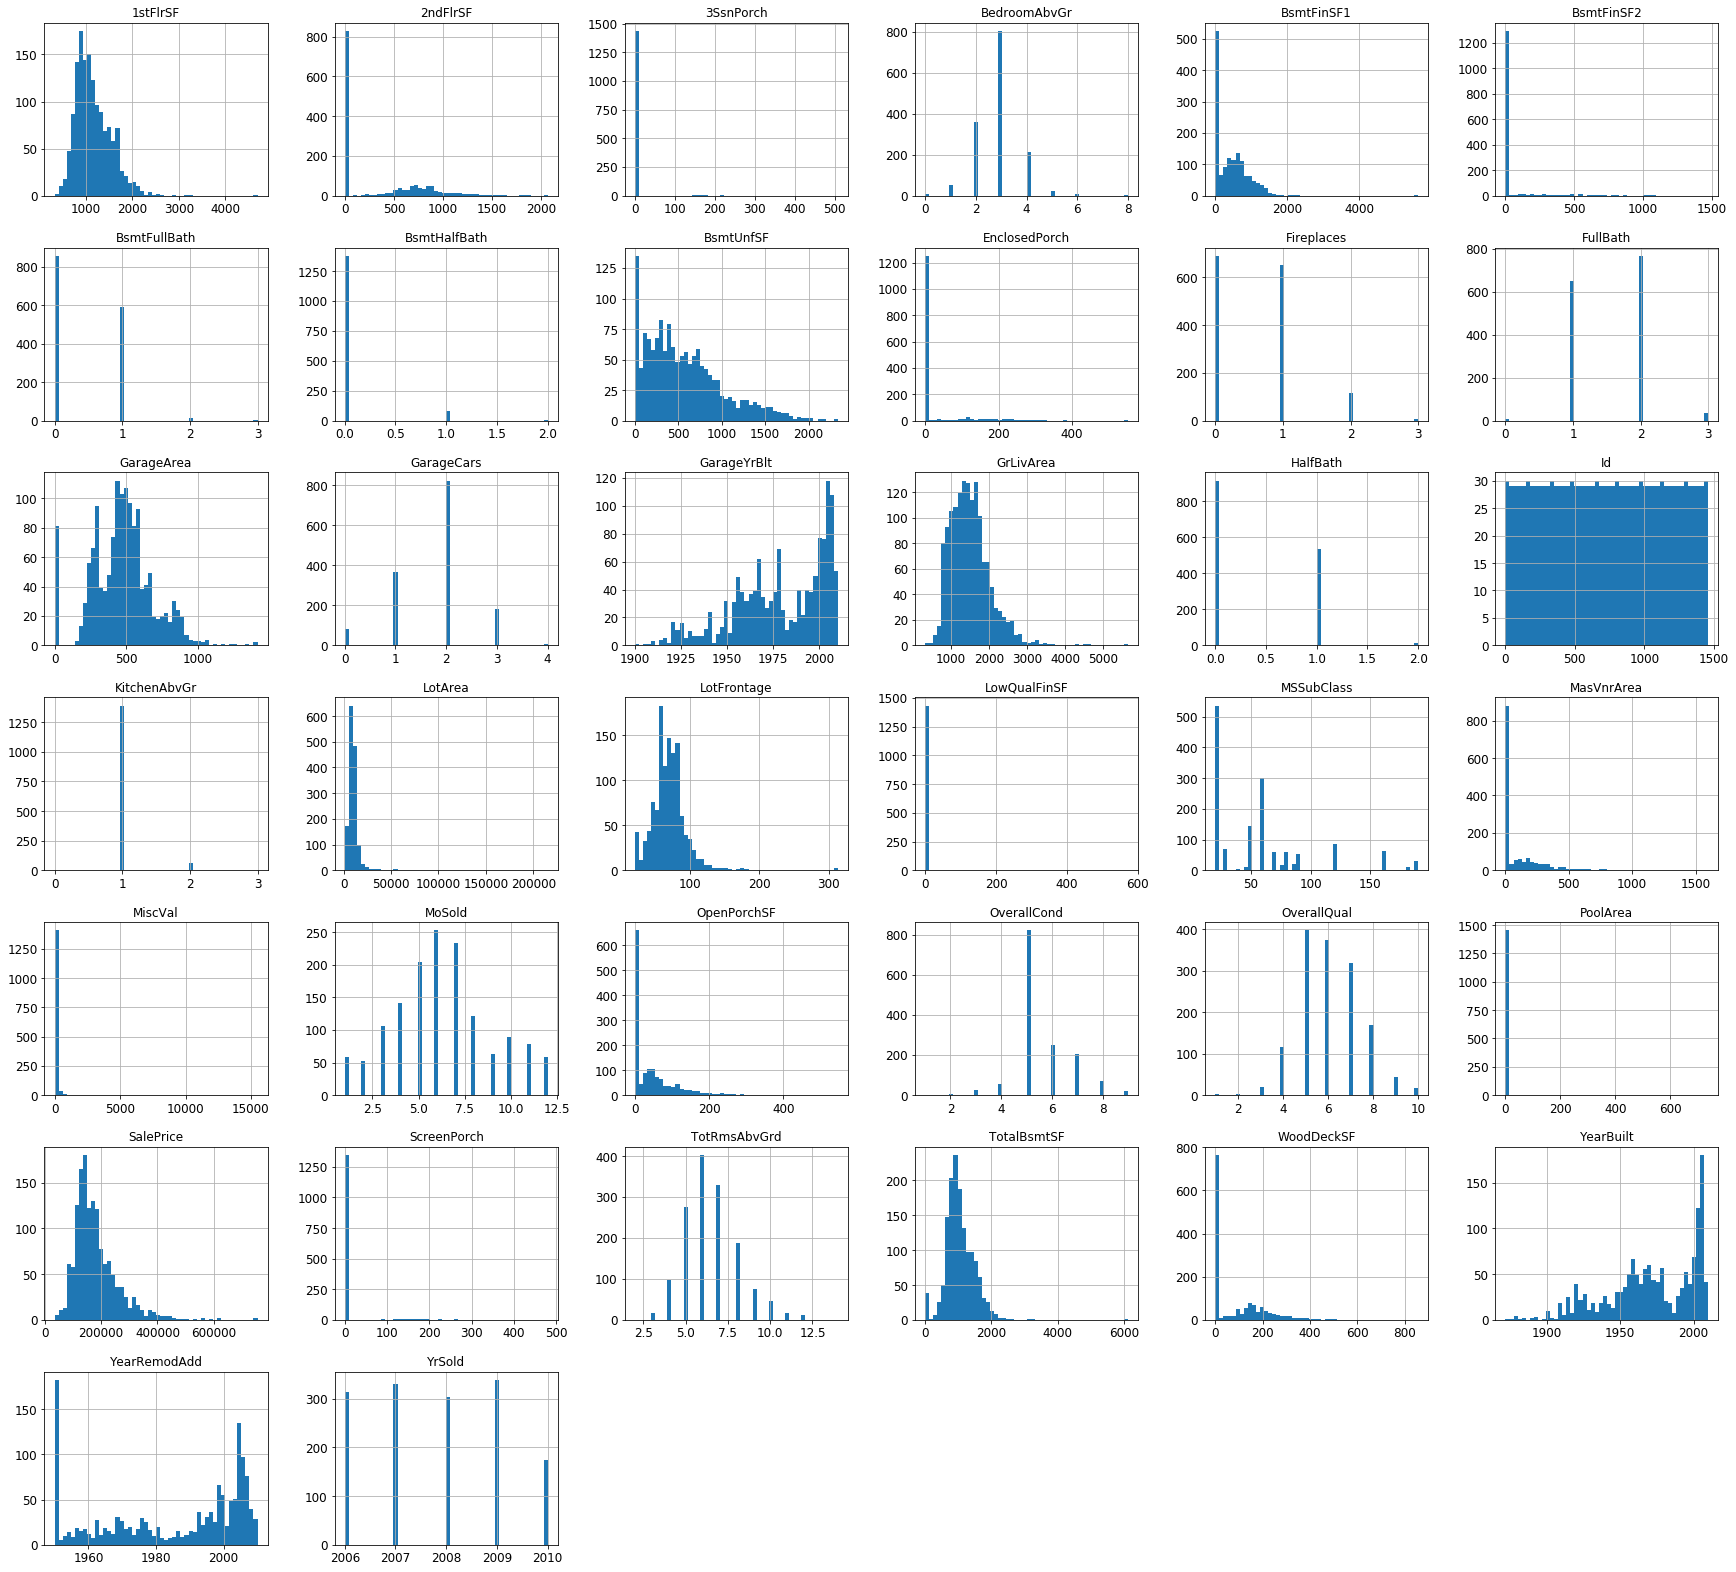

In [66]:
housing.hist(bins=50, figsize=(30,28))
# save_fig("attribute_histogram_plots")
plt.show()

# Exploratory Data Analysis

## Helper Functions

In [195]:
def scatter_category_plot(df, x, y, category, y_mean=True):
    plt_grp = df.copy()[[x,y,category]].groupby(category)
    mean_y = df[y].mean()
    
    fig, ax = plt.subplots()
    ax.margins(0.05)
    for name, group in plt_grp:
        ax.plot(group[x], group[y], marker='o', linestyle = '',
               ms = 5, label=name)
    ax.set_title('Category: {0}'.format(category))
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
    if y_mean:
        plt.axhline(mean_y, color = 'c', linestyle = 'dashed', linewidth = 2, label = 'Average {0}'.format(y))
    ax.legend()
    
    plt.show()

## SalePrice

Average house price: $180,921.20


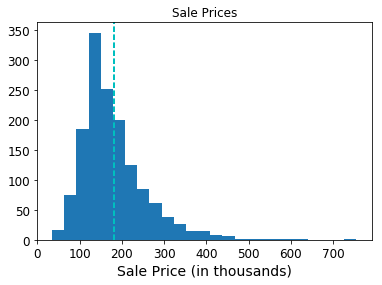

In [183]:
mean_sale_price = housing['SalePrice'].mean()
print('Average house price: ${0:,.2f}'.format(mean_sale_price))
plt.hist(housing['SalePrice']/1000, bins = 25)
plt.axvline(mean_sale_price/1000, color = 'c', linestyle = 'dashed', linewidth = 2)
plt.title('Sale Prices')
plt.xlabel('Sale Price (in thousands)')

## MSSubClass

In [71]:
housing['MSSubClass'].value_counts(ascending=True)

40       4
180     10
45      12
75      16
85      20
190     30
90      52
80      58
70      60
160     63
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, dtype: int64

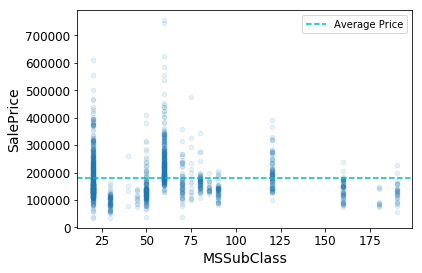

In [182]:
housing.plot(kind='scatter', x='MSSubClass', y='SalePrice', alpha = 0.1)
plt.axhline(mean_sale_price, color = 'c', linestyle = 'dashed', label = 'Average Price')
plt.legend()

## MSZoning

In [185]:
housing['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [186]:
print('Average house price: ${0:,.2f}'.format(mean_sale_price))
housing[['SalePrice', 'MSZoning']].groupby('MSZoning').mean()

Average house price: $180,921.20


,SalePrice
MSZoning,
C (all),74528
FV,214014
RH,131558
RL,191004
RM,126316


In [187]:
print('Average house price: ${0:,.2f}'.format(mean_sale_price))
housing[['SalePrice', 'MSZoning']].groupby('MSZoning').median()

Average house price: $180,921.20


,SalePrice
MSZoning,
C (all),74700
FV,205950
RH,136500
RL,174000
RM,120500


# LotFrontage

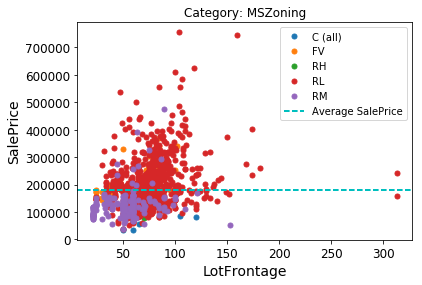

In [196]:
scatter_category_plot(housing, 'LotFrontage', 'SalePrice', 'MSZoning')

## LotArea

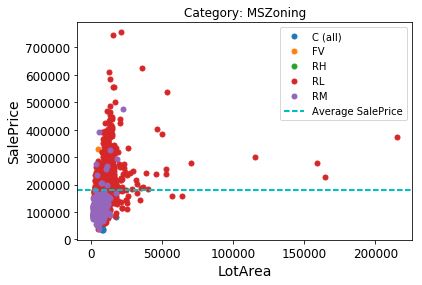

In [197]:
scatter_category_plot(housing, 'LotArea', 'SalePrice', 'MSZoning')

## Street

In [133]:
housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [136]:
housing[['SalePrice', 'Street']].groupby('Street').mean()

,SalePrice
Street,
Grvl,130190
Pave,181130


In [137]:
housing[['SalePrice', 'Street']].groupby('Street').median()

,SalePrice
Street,
Grvl,114250
Pave,163000


## Alley

In [138]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64